# AVOCADO 가격 예측 (Facebook Prophet )



# STEP #0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터 입니다. (2018년도 weekly 데이터)  
- 아보카도 거래량과 가격이 나와 있습니다.

컬럼 설명 :

- Date - 날짜
- AveragePrice - 아보카도 가격
- type - conventional or organic (전통방식이냐, 유기농이냐)
- year - 판매년도
- Region - 판매지역
- Total Volume - 아보카도 판매수량
- 4046 - 농산물 코드입니다
- 4225 - 농산물 코드입니다
- 4770 - 농산물 코드입니다



# STEP #1: 데이터 준비

### Prophet 라이브러리


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# avocado.csv 데이터 읽기

df_avocado = pd.read_csv('../data/avocado.csv')

# STEP #2: EDA(Exploratory Data Analysis) :  탐색적 데이터 분석

In [6]:
df_avocado.drop('Unnamed: 0', axis = 1, inplace= True)

In [7]:
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
df_avocado['Date']

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [9]:
df_avocado = pd.read_csv('../data/avocado.csv', index_col=0, parse_dates= ['Date'] )

In [10]:
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
df_avocado['Date']

0    2015-12-27
1    2015-12-20
2    2015-12-13
3    2015-12-06
4    2015-11-29
        ...    
7    2018-02-04
8    2018-01-28
9    2018-01-21
10   2018-01-14
11   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [12]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


### 데이터의 날짜가 뒤죽박죽 입니다. 날짜로 정렬하시오.

In [13]:
df_avocado['Date']

0    2015-12-27
1    2015-12-20
2    2015-12-13
3    2015-12-06
4    2015-11-29
        ...    
7    2018-02-04
8    2018-01-28
9    2018-01-21
10   2018-01-14
11   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [16]:
df_avocado.sort_values('Date', inplace=True )

In [17]:
df_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [18]:
df_avocado['Date'].unique()

<DatetimeArray>
['2015-01-04 00:00:00', '2015-01-11 00:00:00', '2015-01-18 00:00:00',
 '2015-01-25 00:00:00', '2015-02-01 00:00:00', '2015-02-08 00:00:00',
 '2015-02-15 00:00:00', '2015-02-22 00:00:00', '2015-03-01 00:00:00',
 '2015-03-08 00:00:00',
 ...
 '2018-01-21 00:00:00', '2018-01-28 00:00:00', '2018-02-04 00:00:00',
 '2018-02-11 00:00:00', '2018-02-18 00:00:00', '2018-02-25 00:00:00',
 '2018-03-04 00:00:00', '2018-03-11 00:00:00', '2018-03-18 00:00:00',
 '2018-03-25 00:00:00']
Length: 169, dtype: datetime64[ns]

### 날짜별로 가격이 어떻게 변하는지 간단하게 확인하시오. (plot 이용)

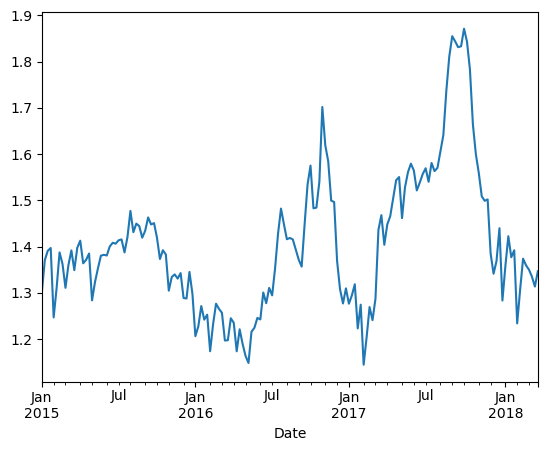

In [22]:
df_avocado.groupby('Date')['AveragePrice'].mean().plot()
plt.show()

### 'region' 별로 데이터 몇개인지 시각화 하시오.

In [23]:
df_avocado['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [24]:
df_avocado['region'].nunique()

54

In [29]:
df_avocado['region'].value_counts()

region
Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth        

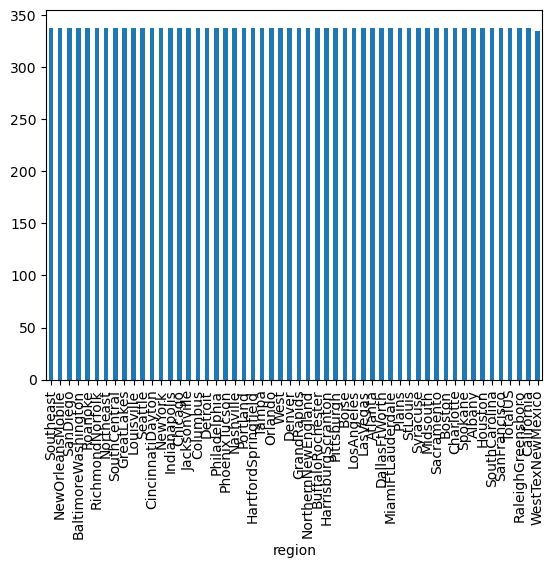

In [31]:
df_avocado['region'].value_counts().plot(kind='bar')
plt.show()

### 년도('year')별로 데이터가 몇건인지 확인하시오.

In [34]:
df_avocado['year'].unique()

array([2015, 2016, 2017, 2018])

In [37]:
df_avocado['year'].value_counts().sort_index()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: count, dtype: int64

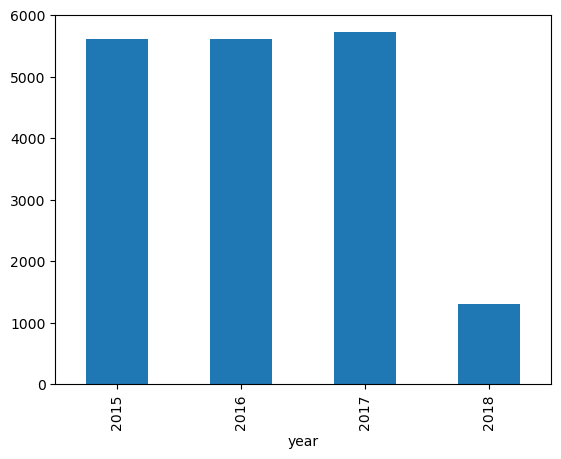

In [41]:
df_avocado['year'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [44]:
df_avocado['Date'].unique()

<DatetimeArray>
['2015-01-04 00:00:00', '2015-01-11 00:00:00', '2015-01-18 00:00:00',
 '2015-01-25 00:00:00', '2015-02-01 00:00:00', '2015-02-08 00:00:00',
 '2015-02-15 00:00:00', '2015-02-22 00:00:00', '2015-03-01 00:00:00',
 '2015-03-08 00:00:00',
 ...
 '2018-01-21 00:00:00', '2018-01-28 00:00:00', '2018-02-04 00:00:00',
 '2018-02-11 00:00:00', '2018-02-18 00:00:00', '2018-02-25 00:00:00',
 '2018-03-04 00:00:00', '2018-03-11 00:00:00', '2018-03-18 00:00:00',
 '2018-03-25 00:00:00']
Length: 169, dtype: datetime64[ns]

#### 요일 정보를 확인해보자.

In [47]:
df_avocado['Date'].dt.day_name()

51    Sunday
51    Sunday
51    Sunday
51    Sunday
51    Sunday
       ...  
0     Sunday
0     Sunday
0     Sunday
0     Sunday
0     Sunday
Name: Date, Length: 18249, dtype: object

In [48]:
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


### 프로펫 분석을 위해, 두개의 컬럼만 가져오시오. ('Date', 'AveragePrice')

In [49]:


df = df_avocado[ ['Date' , 'AveragePrice' ]  ]


In [55]:
df = df.groupby('Date')['AveragePrice'].mean()

In [59]:
df = df.to_frame().reset_index()

In [60]:
df

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


# STEP 3: Prophet 을 이용한 예측 수행

### ds 와 y 로 컬럼명을 셋팅하시오.

In [61]:
from prophet import Prophet

In [62]:
model = Prophet()

In [66]:
df.head(2)

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648


In [67]:
df.columns

Index(['Date', 'AveragePrice'], dtype='object')

In [68]:
df.columns = ['ds' , 'y' ]

In [69]:
df.head(2)

,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648


In [70]:
model.fit(df)

13:19:08 - cmdstanpy - INFO - Chain [1] start processing
13:19:09 - cmdstanpy - INFO - Chain [1] done processing


### 프로펫 예측 하시오.

In [72]:
future = model.make_future_dataframe(periods= 40, freq='W')

In [74]:
forecast = model.predict(future)

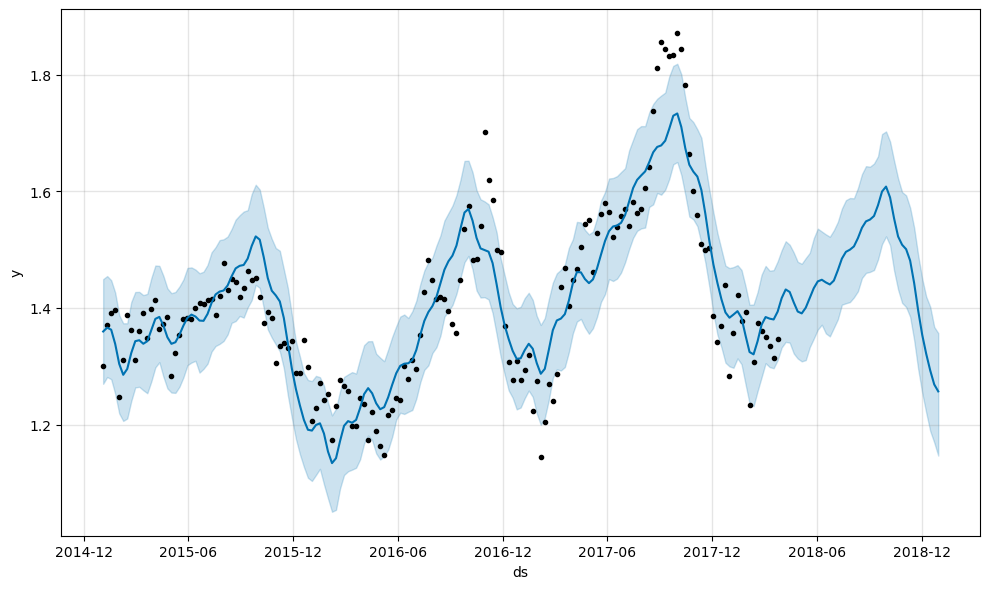

In [75]:
model.plot(forecast)
plt.show()

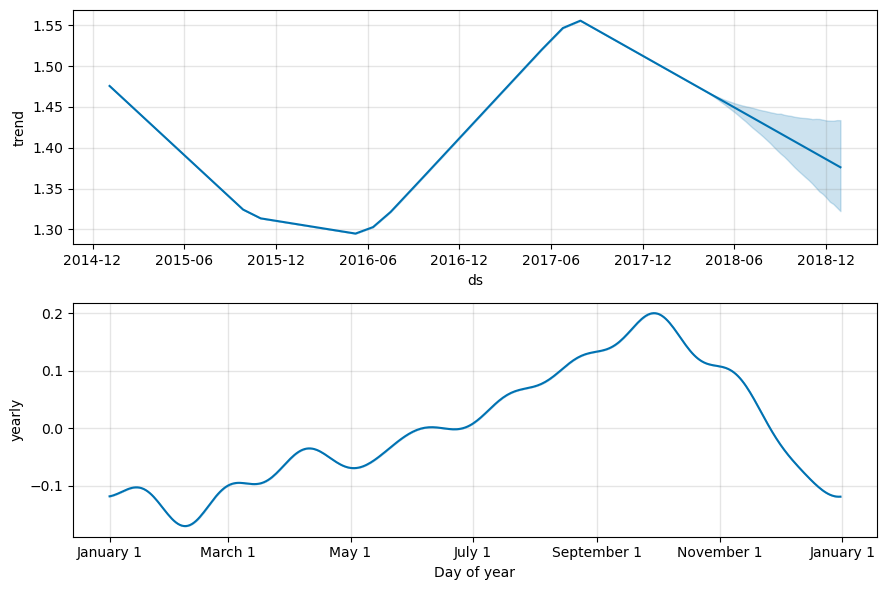

In [76]:
model.plot_components(forecast)
plt.show()

In [77]:
# 365일치를 예측하시오.
future = model.make_future_dataframe(periods= 365, freq='D')

In [79]:
forecast = model.predict(future)

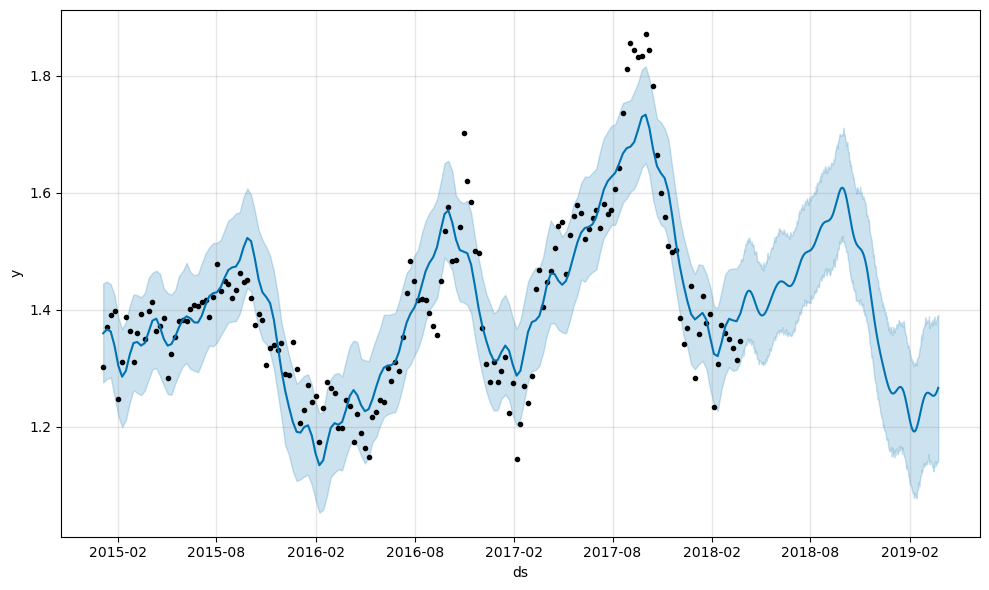

In [81]:
# 차트로 확인하시오.
model.plot(forecast)
plt.show()

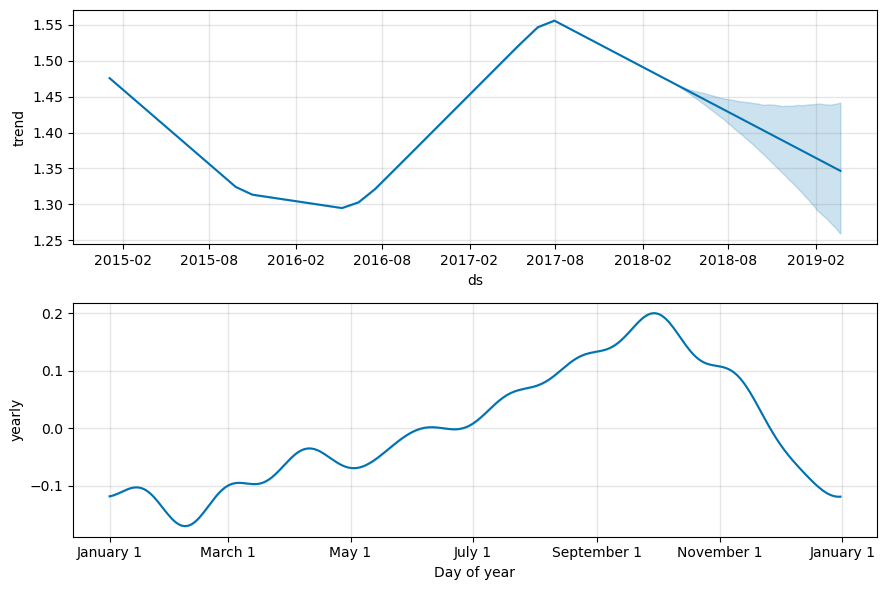

In [83]:
model.plot_components(forecast)
plt.show()

# PART 2 : region 이 west 인 아보카도의 가격을 예측하시오.

In [90]:
sorted( df_avocado['region'].unique() )

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [100]:
avocado_df_sample = df_avocado.loc[df_avocado['region'] == 'West' , ]

In [101]:
avocado_df_sample

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [102]:
model = Prophet()

In [104]:
avocado_df_sample.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West


In [105]:
avocado_df_sample.rename( columns= {'Date' : 'ds', 'AveragePrice':'y' } , inplace= True )

C:\Users\410\AppData\Local\Temp\ipykernel_27048\2025772740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_df_sample.rename( columns= {'Date' : 'ds', 'AveragePrice':'y' } , inplace= True )


In [106]:
avocado_df_sample.head(2)

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West


In [107]:
model.fit(avocado_df_sample)

15:05:37 - cmdstanpy - INFO - Chain [1] start processing
15:05:37 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
future = model.make_future_dataframe(periods= 40, freq='W')

In [109]:
forecast = model.predict(future)

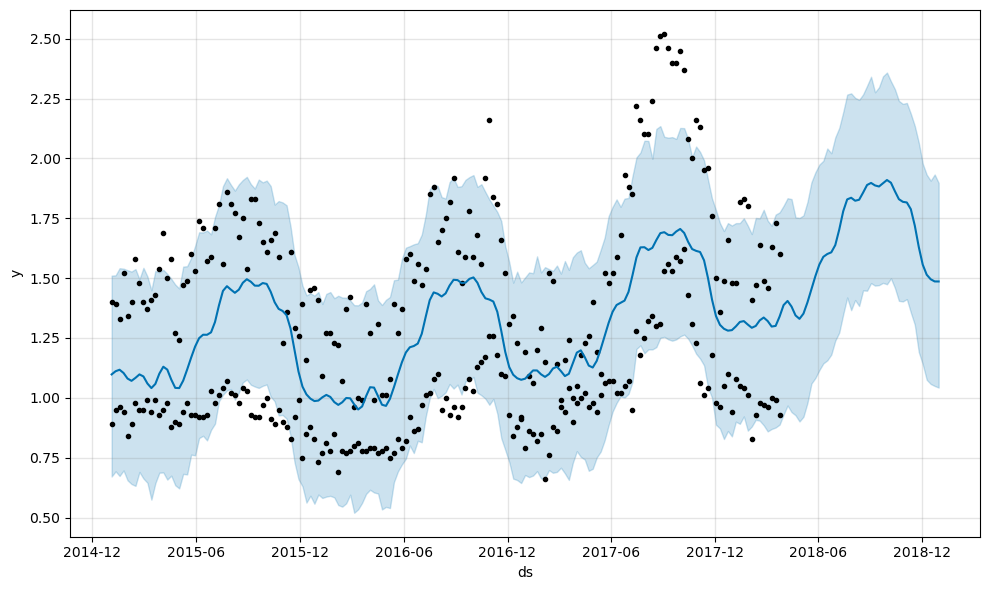

In [110]:
model.plot(forecast)
plt.show()

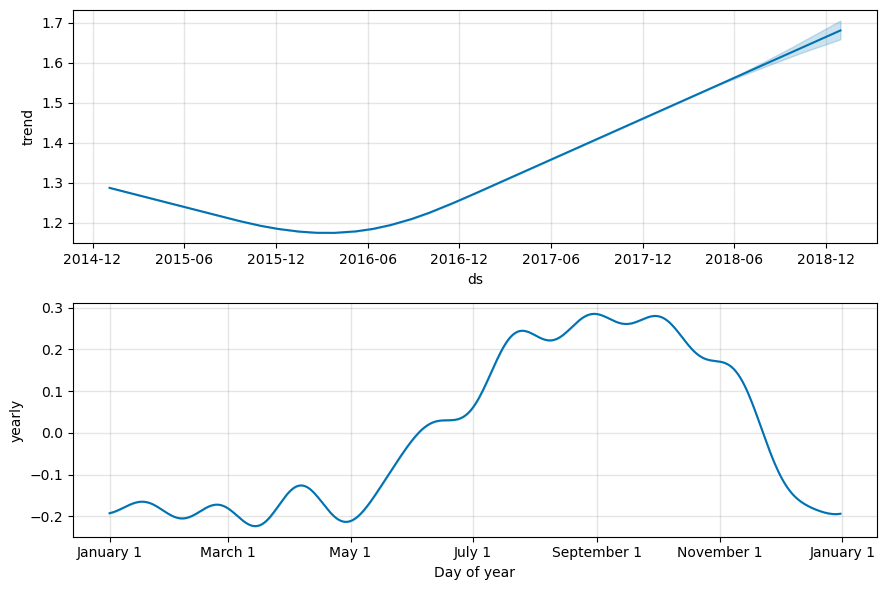

In [111]:
model.plot_components(forecast)
plt.show()